<h1 style="text-align: left; color:#52595D"> Lab Logistic Regression: End to End Project Using  sklearn </h1>



<figure>
<img align="center" src="https://github.com/antonioGoncalves64/ML/blob/main/images/robby.png?raw=1"     style=" width:250px; padding: 10px; " >
</figure>



In [1]:
!rm -r /content/ML
!git clone https://github.com/antonioGoncalves64/ML 
!mv  /content/ML/* .

import pandas as pd
import numpy as np

rm: cannot remove '/content/ML': No such file or directory
Cloning into 'ML'...
remote: Enumerating objects: 357, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 357 (delta 77), reused 109 (delta 32), pack-reused 192
Receiving objects: 100% (357/357), 10.67 MiB | 17.15 MiB/s, done.
Resolving deltas: 100% (164/164), done.


# Clean Data

In [2]:
df = pd.read_csv('/content/datasets/Heart/Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


## Delete Delete unneeded columns

In [3]:
# Delete the column Unnamed: 0, as it is not needed
df = df.drop(columns = 'Unnamed: 0')

## Convert all string values to numeric values

In [4]:
# Convert string values to numeric values
df['ChestPain'] = df['ChestPain'].astype('category')
df['ChestPain'] = df['ChestPain'].cat.codes

df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes

df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes

df


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


## Treat the lines where the items have no value

In [5]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

## Create the list with the independent variables (X)  and the list with the dependent variable (y)

In [7]:

# Create independent variables set X 

X = df.drop(columns='AHD')
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2


In [8]:
 # Create dependt variables set y 

y = df['AHD']
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 299, dtype: int8

## Split a Dataset into Train and Test Sets

In [10]:
from sklearn.model_selection import train_test_split
# The random state  controls the shuffling process.
# We use 30% of data for test the model and 70% of values do create the model.
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=21)

In [11]:
# Show data  set used to train the model
X_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
290,67,1,1,152,212,0,2,150,0,0.8,2,0.0,2
264,61,1,0,138,166,0,2,125,1,3.6,2,1.0,1
197,45,0,0,138,236,0,2,152,1,0.2,2,0.0,1
77,51,0,1,140,308,0,2,142,0,1.5,1,1.0,1
15,57,1,1,150,168,0,0,174,0,1.6,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,69,1,1,140,254,0,2,146,0,2.0,2,3.0,2
120,48,1,0,130,256,1,2,150,1,0.0,1,2.0,2
48,65,0,1,140,417,1,2,157,0,0.8,1,1.0,1
262,60,0,3,150,240,0,0,171,0,0.9,1,0.0,1


In [12]:
# Show data set used to test the model
X_test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
61,46,0,1,142,177,0,2,160,1,1.4,3,0.0,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2
55,54,1,0,124,266,0,2,109,1,2.2,2,1.0,2
245,67,1,0,120,237,0,0,71,0,1.0,2,0.0,1
95,52,1,0,128,255,0,0,161,1,0.0,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,41,1,2,135,203,0,0,132,0,0.0,2,0.0,0
117,35,0,0,138,183,0,0,182,0,1.4,1,0.0,1
211,38,1,3,120,231,0,0,182,1,3.8,2,0.0,2
233,74,0,2,120,269,0,2,121,1,0.2,1,1.0,1


# Perform Feature Scaling

Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
# The reason you want to fit the scaler using only the training data is because 
# you don't want to bias your model with information from the test data.


X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 1.38573367,  0.67185481,  0.21213203, ...,  0.70792084,
        -0.70203785,  1.13274336],
       [ 0.71454401,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339, -0.49996949],
       [-1.07529507, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949],
       ...,
       [ 1.16200378, -1.48841682,  0.21213203, ..., -1.01249144,
         0.36119339, -0.49996949],
       [ 0.60267907, -1.48841682,  2.32335085, ..., -1.01249144,
        -0.70203785, -0.49996949],
       [ 0.82640895, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949]])

In [15]:

X_test_scaled = scaler.transform(X_test)
X_test_scaled


array([[-0.96343013, -1.48841682,  0.21213203, ...,  2.42833312,
        -0.70203785, -0.49996949],
       [ 0.26708424,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339,  1.13274336],
       [-0.06851059,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339,  1.13274336],
       ...,
       [-1.85834967,  0.67185481,  2.32335085, ...,  0.70792084,
        -0.70203785,  1.13274336],
       [ 2.16878827, -1.48841682,  1.26774144, ..., -1.01249144,
         0.36119339, -0.49996949],
       [ 1.05013884, -1.48841682, -0.84347737, ...,  0.70792084,
         1.42442462, -0.49996949]])

# Create Logistic regression Model

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [17]:
log_reg.predict(X_train_scaled)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int8)

In [25]:
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int8)

## Score our Model

In [26]:
log_reg.score(X_train_scaled, y_train)

0.8708133971291866

In [27]:
log_reg.score(X_test_scaled, y_test)

0.8666666666666667

In [28]:
#Measuring Accuracy using confusion matrix for all the algorithms 
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[45,  1],
       [11, 33]])

# Data Visualization

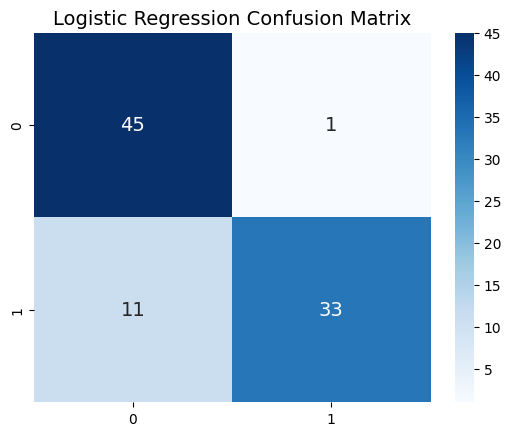

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        46
           1       0.97      0.75      0.85        44

    accuracy                           0.87        90
   macro avg       0.89      0.86      0.86        90
weighted avg       0.89      0.87      0.86        90



In [29]:

import seaborn as sns
import matplotlib.pyplot as plt



plt.title("Logistic Regression Confusion Matrix",fontsize=14)
sns.heatmap(conf_matrix,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 14})
plt.show()

#True Positives = 45
#True Negative = 33
#False Positive = 1
#False Negative = 11



# Classification Report

In [32]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

 


              precision    recall  f1-score   support

           0       0.80      0.98      0.88        46
           1       0.97      0.75      0.85        44

    accuracy                           0.87        90
   macro avg       0.89      0.86      0.86        90
weighted avg       0.89      0.87      0.86        90



# Interpret classification report

* **Precision**
 * Of all the people the model predicted to have diabetes,  97% actually had it.
 * When we predict True, how often is it really True?
 * This number should be as high as possible.
 * High precision: Not many True values were predicted as False

* **Recall**
 * Of all the people who had diabetes, the model correctly predicted  this outcome for 73% of those people.
 * Also named **sensivity**, or hit rate, tells us the fraction of correctly identified positive predictions.
 * What fraction of the True predictions were actually True?This number should be as high as possible.
 * **High recall:** Predicted most True values correctly.

* **f1-score** 
 * Since this value is  very close to 1, it tells us that the model does a good job of predicting whether or not people have diabetes.
 * F measure, measures precision and recall at the same time by finding the harmonic mean of the two values.
 * This score is useful when you have opposite scores coming from precision and recall.

* **suporte** 
 * These values simply tell us how many people belonged to each class in the test dataset. We can see that among the players in the test dataset 44 has diabetes and 46 did not have diabetes


* **Accuracy**
 * Of all the people the model predicted well 87% actually was correct
 * measures the accuracy of all predictions (positive and negative).
 * Accuracy should be as high as possible.

